In [1]:
import sys

sys.path.append("..")

import tensorflow as tf

import numpy as np

from utils import tf_config

dataset="01"
memory_limit=1500
n_individuals=10
interval_eeg=10
seed=89#works: 2,3,5,21,34,89

#tf_config.set_seed(seed=seed)
#tf_config.setup_tensorflow(device="GPU", memory_limit=memory_limit)

import GPyOpt

import argparse

from utils import preprocess_data, search_algorithms, train, losses_utils, metrics, bnn_utils, eeg_utils, viz_utils

from models import fmri_ae, eeg_to_fmri, uniconv_fmri

from layers import locally_connected, fourier_features

import matplotlib.pyplot as plt

import gc

import os

from sklearn.model_selection import train_test_split, KFold

import time

with tf.device('/CPU:0'):
    train_data, _ = preprocess_data.dataset(dataset, n_individuals=n_individuals,
                                            interval_eeg=interval_eeg, 
                                            ind_volume_fit=False,
                                            standardize_fmri=True,
                                            iqr=False,
                                            verbose=True)
    eeg_train,fmri_train=train_data

2022-03-14 11:19:41.167127: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-14 11:19:45.509189: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-14 11:19:45.514999: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-14 11:19:45.668965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-14 11:19:45.669548: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX150 computeCapability: 6.1
coreClock: 1.5315GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 44.76GiB/s
2022-03-14 11:19:45.669587: I tensorflow/stream_executor/platform/default/dso_l

I: Starting to Load Data
I: Finished Loading Data
I: Pairs Created


In [2]:
eeg_train = eeg_train[:100]
fmri_train = fmri_train[:100]

## Plotting EEG channel system 64 10-20 system

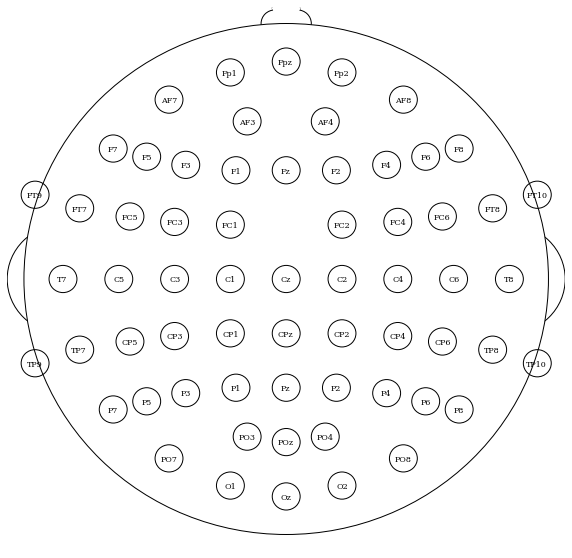

In [32]:
import importlib
importlib.reload(viz_utils)

#placeholder
attention_scores = np.zeros((len(getattr(eeg_utils, "channels_"+dataset)), 
                                           len(getattr(eeg_utils, "channels_"+dataset))))

fig = viz_utils.plot_attention_eeg(attention_scores,
                            dataset="03",
                            plot_names=True,
                            edge_threshold=np.percentile(attention_scores, 99.9),
                            save=True,
                            save_format="pdf",
                            save_path="/tmp/01_channel_attention_relevances.pdf",)

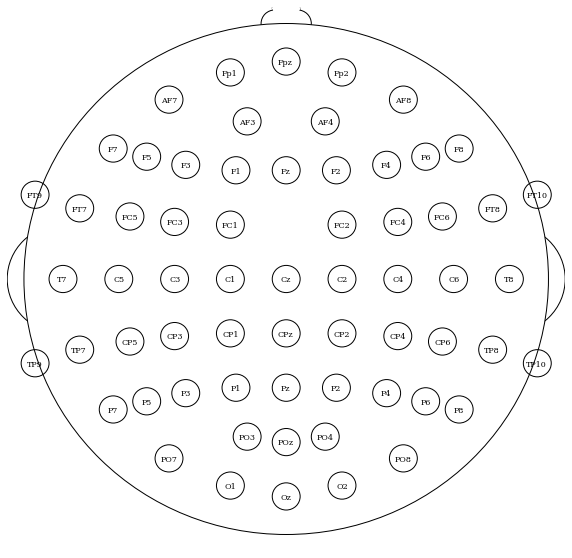

In [33]:
fig